In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
dataset = sns.load_dataset("titanic")
dataset.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [3]:
dataset.drop(columns=["class","who","deck","embark_town","alive"],inplace=True)

In [4]:
dataset.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
adult_male      0
alone           0
dtype: int64

In [5]:
dataset["age"].fillna(dataset["age"].mean(),inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


In [7]:
p = dataset.select_dtypes(include=["object","bool"]).columns
p

Index(['sex', 'embarked', 'adult_male', 'alone'], dtype='object')

In [8]:
df = {}

# Data Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for i in p:
    la = LabelEncoder()
    ar = la.fit_transform(dataset[i])
    df[i] = ar

In [11]:
pd.DataFrame(df)

,sex,embarked,adult_male,alone
0,1,2,1,0
1,0,0,0,0
2,0,2,0,1
3,0,2,0,0
4,1,2,1,1
...,...,...,...,...
886,1,2,1,1
887,0,2,0,1
888,0,2,0,0
889,1,0,1,1


In [12]:
dataset.drop(columns=p,inplace=True)

In [13]:
dataset = pd.concat((dataset,pd.DataFrame(df)),axis=1)

In [14]:
dataset

,survived,pclass,age,sibsp,parch,fare,sex,embarked,adult_male,alone
0,0,3,22.000000,1,0,7.2500,1,2,1,0
1,1,1,38.000000,1,0,71.2833,0,0,0,0
2,1,3,26.000000,0,0,7.9250,0,2,0,1
3,1,1,35.000000,1,0,53.1000,0,2,0,0
4,0,3,35.000000,0,0,8.0500,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,2,1,1
887,1,1,19.000000,0,0,30.0000,0,2,0,1
888,0,3,29.699118,1,2,23.4500,0,2,0,0
889,1,1,26.000000,0,0,30.0000,1,0,1,1


# Data Scaling

In [15]:
input_data = dataset.iloc[:,:-1]
output_data = dataset["survived"]

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st = StandardScaler()
input_data = pd.DataFrame(st.fit_transform(input_data),columns=input_data.columns)

In [18]:
input_data

,survived,pclass,age,sibsp,parch,fare,sex,embarked,adult_male
0,-0.789272,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.737695,0.581114,0.811922
1,1.266990,-1.566107,0.638789,0.432793,-0.473674,0.786845,-1.355574,-1.938460,-1.231645
2,1.266990,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,0.581114,-1.231645
3,1.266990,-1.566107,0.407926,0.432793,-0.473674,0.420730,-1.355574,0.581114,-1.231645
4,-0.789272,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.737695,0.581114,0.811922
...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,0.737695,0.581114,0.811922
887,1.266990,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,-1.355574,0.581114,-1.231645
888,-0.789272,0.827377,0.000000,0.432793,2.008933,-0.176263,-1.355574,0.581114,-1.231645
889,1.266990,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,0.737695,-1.938460,0.811922


# Train_Test_Split Methods

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)

# K-Neighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=5,)

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
knn.predict(x_test)

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [24]:
knn.score(x_test,y_test)*100, knn.score(x_train,y_train)*100

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

(99.4413407821229, 99.29775280898876)

# Confusion Matrics

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test,knn.predict(x_test))

C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[105,   0],
       [  1,  73]], dtype=int64)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
lr.score(x_test,y_test),lr.score(x_train,y_train)

(1.0, 1.0)

In [31]:
confusion_matrix(y_test,lr.predict(x_test))

array([[105,   0],
       [  0,  74]], dtype=int64)

# K-Neighbors Regression

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knr = KNeighborsRegressor(n_neighbors=5)

In [34]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [35]:
knr.predict(x_test)

array([1. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 1. , 0. , 0. , 0. ,
       0. , 0. , 1. , 1. , 1. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. ,
       0. , 1. , 0. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 1. , 1. , 1. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 1. , 1. ,
       0. , 1. , 0. , 1. , 0. , 1. , 1. , 1. , 0. , 1. , 1. , 0. , 0. ,
       0.2, 0. , 0. , 0. , 1. , 0. , 1. , 1. , 1. , 0. , 0. , 0. , 1. ,
       0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 1. ,
       0. , 0. , 0. , 0. , 0. , 1. , 1. , 1. , 0. , 0. , 0. , 1. , 0. ,
       0. , 0. , 1. , 0. , 1. , 1. , 1. , 0. , 1. , 1. , 0. , 0. , 0. ,
       0. , 1. , 0.2, 0. , 1. , 1. , 1. , 0. , 1. , 1. , 0. , 0. , 0. ,
       1. , 1. , 0. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ,
       1. , 1. , 1. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 0. , 1. , 0. ,
       0. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 1. ])

In [36]:
knr.score(x_test,y_test)*100,knr.score(x_train,y_train)*100

(97.41981981981982, 98.03738066424633)

In [37]:
confusion_matrix(y_test,lr.predict(x_test))

array([[105,   0],
       [  0,  74]], dtype=int64)

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtc1 = DecisionTreeClassifier(criterion='gini',max_depth=5)
dtc2 = DecisionTreeClassifier(criterion='entropy')

In [40]:
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [41]:
dtc1.score(x_test,y_test),dtc1.score(x_train,y_train)

(1.0, 1.0)

In [42]:
dtc2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
dtc2.score(x_test,y_test),dtc2.score(x_train,y_train)

(1.0, 1.0)

In [44]:
confusion_matrix(y_test,dtc2.predict(x_test))

array([[105,   0],
       [  0,  74]], dtype=int64)

# Decision Tree Graph...

In [45]:
from sklearn import tree

[Text(0.5, 0.75, 'X[0] <= 0.239\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 444\nvalue = [444, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 268\nvalue = [0, 268]')]

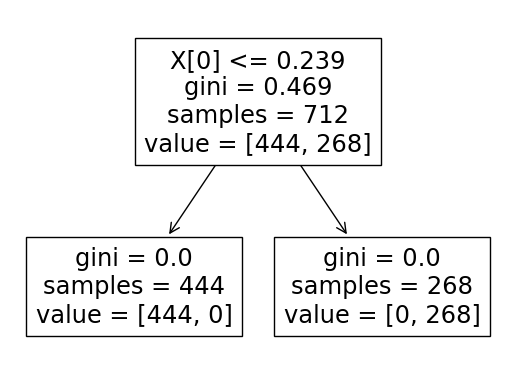

In [46]:
tree.plot_tree(dtc1)

# Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=50)

In [49]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [50]:
rfc.score(x_test,y_test),rfc.score(x_train,y_train)

(1.0, 1.0)

In [51]:
confusion_matrix(y_train,rfc.predict(x_train))

array([[444,   0],
       [  0, 268]], dtype=int64)

# Plots 

In [55]:
import matplotlib.pyplot as plt

In [65]:
sc_train = []
sc_test = []
no_max = [i for i in range(1,21)]

In [71]:
len(sc_train), len(no_max), len(sc_test)

(20, 20, 20)

In [66]:
for i in range(1,21):
    dtc1 = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtc1.fit(x_train,y_train)
    sc_train.append(dtc1.score(x_train,y_train))
    sc_test.append(dtc1.score(x_test,y_test))
    

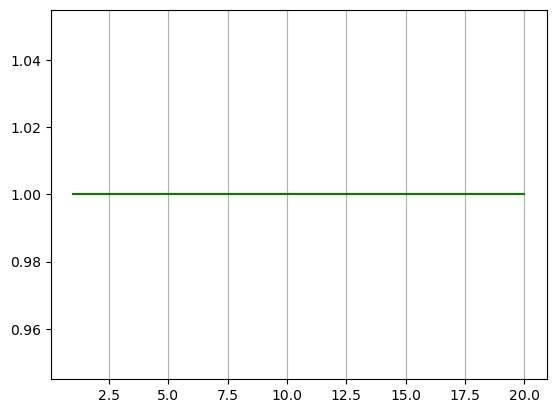

In [73]:
plt.plot(no_max,sc_train,c='r')
plt.plot(no_max,sc_test,c='g')
plt.grid(axis="x")
plt.show()